# K-means clustering

Carlos Adrián Palmieri Álvarez A01635776

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [13]:
# Import the packages that we will be using
import numpy as np                  # For array
import pandas as pd                 # For data handling
import seaborn as sns               # For advanced plotting
import matplotlib.pyplot as plt     # For showing plots

# Note: specific functions of the "sklearn" package will be imported when needed to show concepts easily


In [14]:
# Define where you are running the code: colab or local
RunInColab          = False     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

else:
    # Define path del proyecto
    Ruta            = ""

# Importing data

In [15]:
# Define the col names for the iris dataset
colnames = ["Sepal_Length", "Sepal_Width","Petal_Length","Petal_Width", "Flower"]

# Dataset url
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

# Load the dataset from HHDD
dataset  = pd.read_csv(url, header = None, names = colnames )

dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [16]:
# Print dataset
dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [17]:
# Print dataset shape
dataset.shape

(150, 5)

In [18]:
# Print column names
dataset.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width', 'Flower'], dtype='object')

2. Drop rows with any missing values


In [19]:
# Check how many values are missing (NaN) in the dataset
print(dataset.isnull().sum())


# Drop na
dataset = dataset.dropna()

Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
Flower          0
dtype: int64


3. Encoding the class label categorical column: from string to num


In [20]:
# Encoding the categorical column: {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2}
dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })

# Saving the dictionary encoding for the flowers
flower_names = {0: "Iris-setosa", 1: "Iris-versicolor", 2: "Iris-virginica"}

#Visualize the dataset
dataset

C:\Users\palmi\AppData\Local\Temp\ipykernel_30932\1050431820.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset = dataset.replace({"Flower":  {"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":2} })


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [21]:
# If necesary, drop out non necesary columns


5. Scatter plot of the data

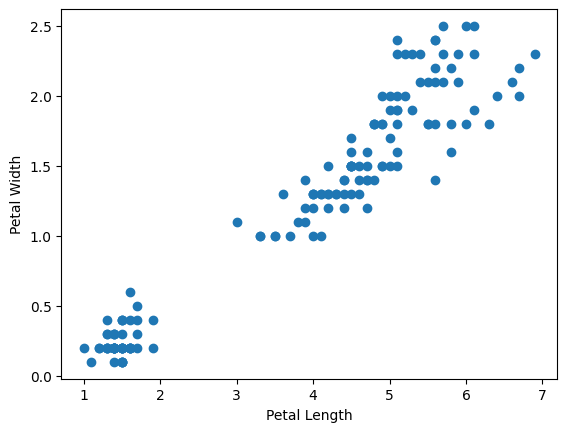

In [22]:
# Scatter plot of Petal_Length vs Petal_Width
plt.scatter(dataset.Petal_Length,dataset.Petal_Width)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.show()


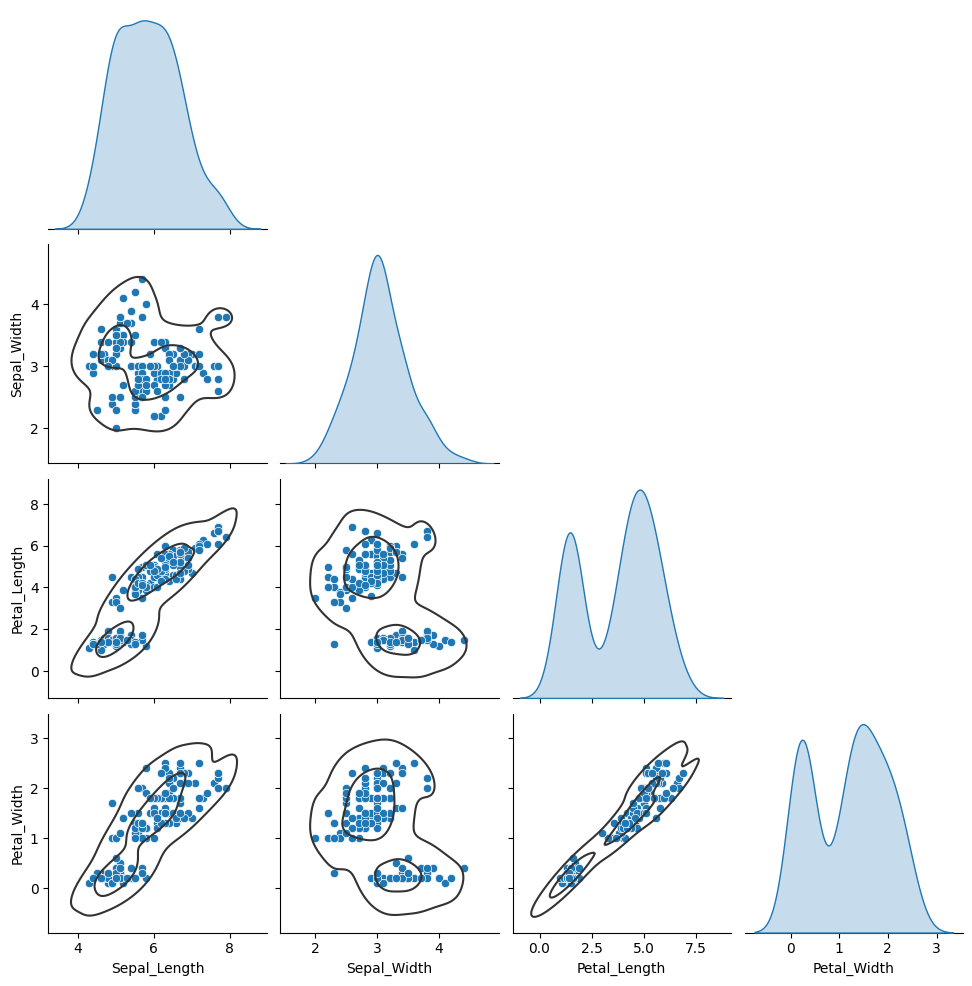

In [23]:
# Pairplot: Scatterplot of all variables (not the flower type)
g = sns.pairplot(dataset[['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width']], corner=True, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=3, color=".2")
plt.show()


6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

In [24]:
# Get dataframes for each real cluster
df1 = dataset[dataset.Flower==0]
df2 = dataset[dataset.Flower==1]
df3 = dataset[dataset.Flower==2]

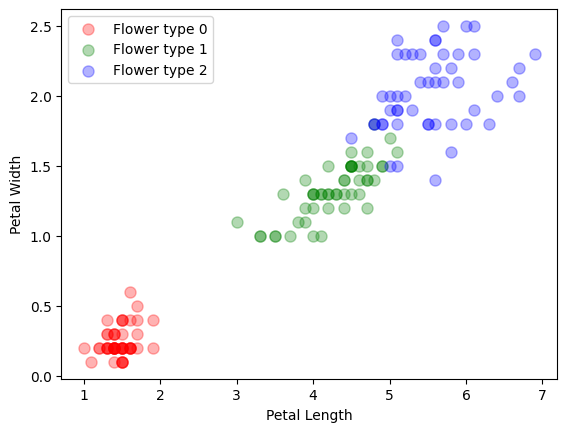

In [25]:
# Scatter plot of each real cluster for Petal
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()



Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [39]:
# Import sklearn KMeans
from sklearn.cluster import KMeans

# Define number of clusters
km = KMeans(n_clusters=3, random_state=0)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(dataset[['Petal_Length','Petal_Width','Sepal_Length','Sepal_Width']])

# Print estimated cluster of each point in the dataset
yp


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [43]:
# Manual pairing the labels of the real and estimated clusters
dataset['Cluster1'] = dataset['Cluster1'].replace({0:1, 1:0, 2:2})
dataset


,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Flower,Cluster1
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [ ]:
# Label of the estimated clusters
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [ ]:
# Cluster centroides
km.cluster_centers_

array([[4.38852459, 1.43442623, 5.88360656, 2.74098361],
       [1.464     , 0.244     , 5.006     , 3.418     ],
       [5.71538462, 2.05384615, 6.85384615, 3.07692308]])

In [ ]:
# Sum of squared error (sse) of the final model
km.inertia_

78.9450658259773

In [47]:
# The number of iterations required to converge
km.n_iter_

7

<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

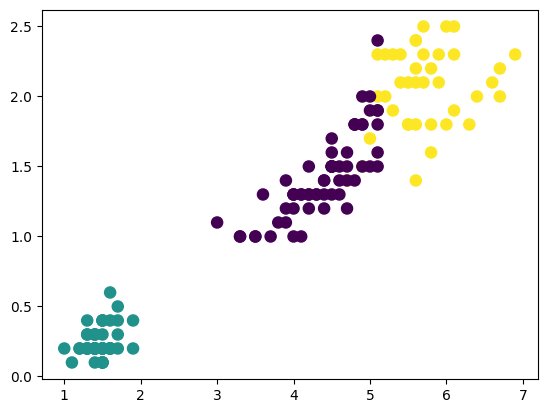

In [48]:
# Scatter plot of the estimated clusters
plt.scatter(dataset.Petal_Length, dataset.Petal_Width, c=km.labels_, s=64, cmap='viridis')


## Plot both real and estimated clusters to check for errors

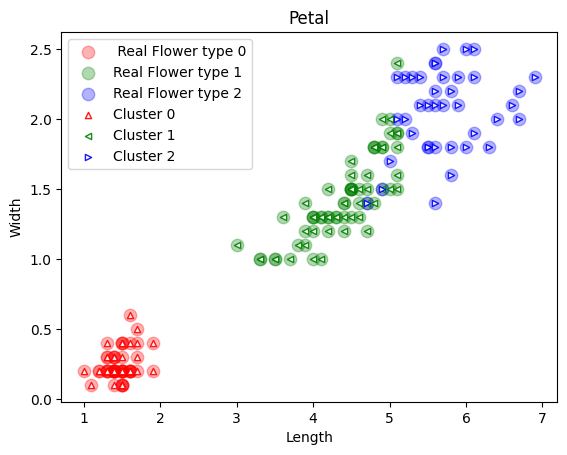

In [72]:
# Scatter plot of the real clusters
plt.scatter(df1.Petal_Length, df1.Petal_Width, label=' Real Flower type 0', c='r', marker='o', s=80, alpha=0.3)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Real Flower type 1', c='g', marker='o', s=80, alpha=0.3)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Real Flower type 2', c='b', marker='o', s=80, alpha=0.3)

# Scatter plot of the estimated clusters
#plt.scatter(dataset.Petal_Length, dataset.Petal_Width, label = "Estimated cluster",  c=km.labels_, s=15, cmap='viridis')

# Get dataframes for each estimated cluster
df1 = dataset[dataset.Cluster1==0]
df2 = dataset[dataset.Cluster1==1]
df3 = dataset[dataset.Cluster1==2]


# Scatter plot of each estimated cluster
plt.scatter(df1.Petal_Length, df1.Petal_Width, label='Cluster 0',      c='white', edgecolor='r', marker='^', s=20, alpha=0.9)
plt.scatter(df2.Petal_Length, df2.Petal_Width, label='Cluster 1',      c='white', edgecolor='g', marker='<', s=20, alpha=0.9)
plt.scatter(df3.Petal_Length, df3.Petal_Width, label='Cluster 2',      c='white', edgecolor='b', marker='>', s=20, alpha=0.9)

plt.title('Petal')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()

plt.show()



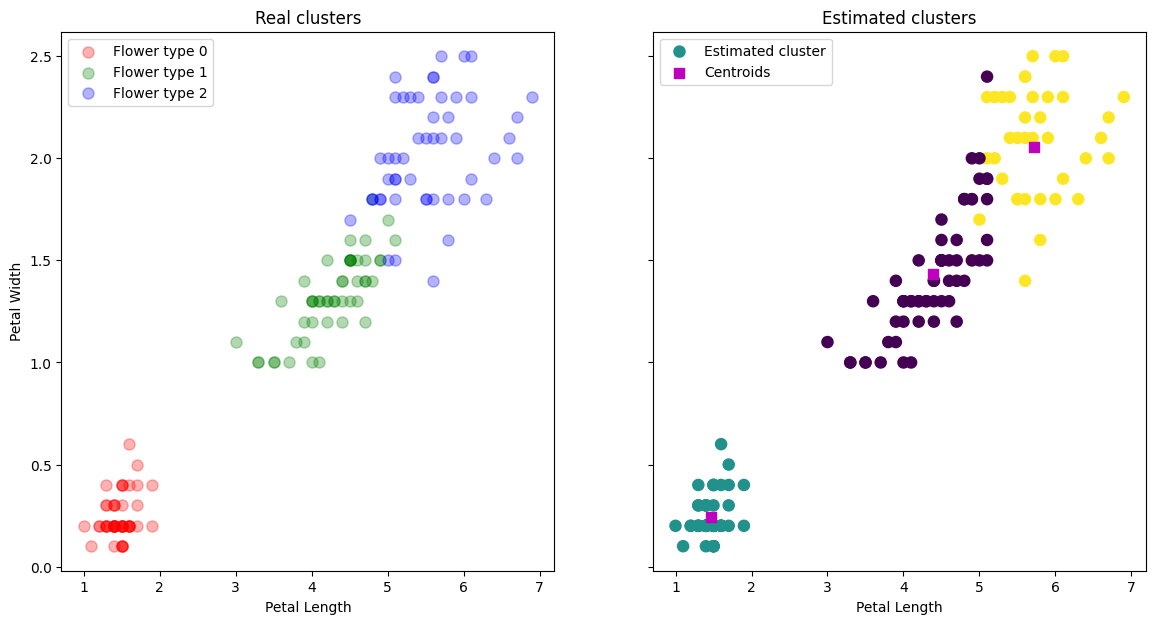

In [60]:
# Making two graphs to compare the real and estimated clusters
fig, axs = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Real clusters
axs[0].scatter(df1.Petal_Length, df1.Petal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
axs[0].scatter(df2.Petal_Length, df2.Petal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
axs[0].scatter(df3.Petal_Length, df3.Petal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)
axs[0].set_xlabel('Petal Length')
axs[0].set_ylabel('Petal Width')
axs[0].set_title('Real clusters')
axs[0].legend()

# Estimated clusters
axs[1].scatter(dataset.Petal_Length, dataset.Petal_Width, c=km.labels_, s=64, cmap='viridis', label='Estimated cluster')
axs[1].scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='m', s=50, marker='s', label='Centroids')
axs[1].set_xlabel('Petal Length')
axs[1].set_title('Estimated clusters')
axs[1].legend()
plt.show()


## Using K = 2

In [63]:
# Define number of clusters
km = KMeans(n_clusters=2, random_state=0)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(dataset[['Petal_Length','Petal_Width','Sepal_Length','Sepal_Width']])

# Print estimated cluster of each point in the dataset
yp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

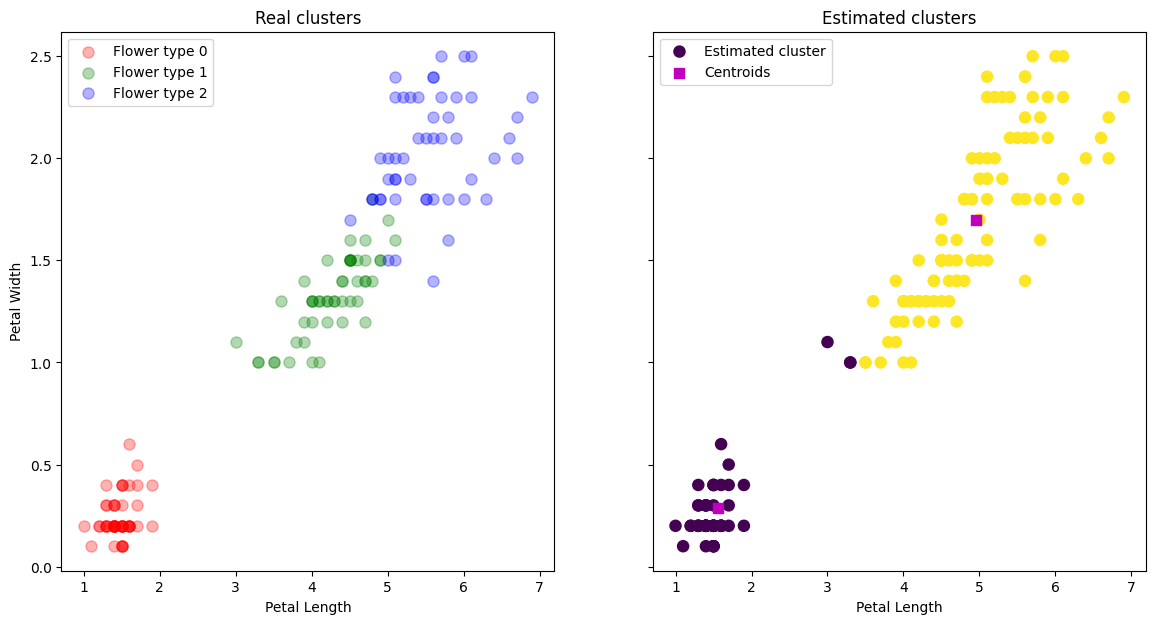

In [64]:
# Making two graphs to compare the real and estimated clusters
fig, axs = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Real clusters
axs[0].scatter(df1.Petal_Length, df1.Petal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
axs[0].scatter(df2.Petal_Length, df2.Petal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
axs[0].scatter(df3.Petal_Length, df3.Petal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)
axs[0].set_xlabel('Petal Length')
axs[0].set_ylabel('Petal Width')
axs[0].set_title('Real clusters')
axs[0].legend()

# Estimated clusters
axs[1].scatter(dataset.Petal_Length, dataset.Petal_Width, c=km.labels_, s=64, cmap='viridis', label='Estimated cluster')
axs[1].scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='m', s=50, marker='s', label='Centroids')
axs[1].set_xlabel('Petal Length')
axs[1].set_title('Estimated clusters')
axs[1].legend()
plt.show()


### Using K = 4

In [66]:
# Define number of clusters
km = KMeans(n_clusters=4, random_state=0)

# Do K-means clustering (assing each point in the dataset to a cluster)
yp = km.fit_predict(dataset[['Petal_Length','Petal_Width','Sepal_Length','Sepal_Width']])

# Print estimated cluster of each point in the dataset
yp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
       0, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2,
       3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3])

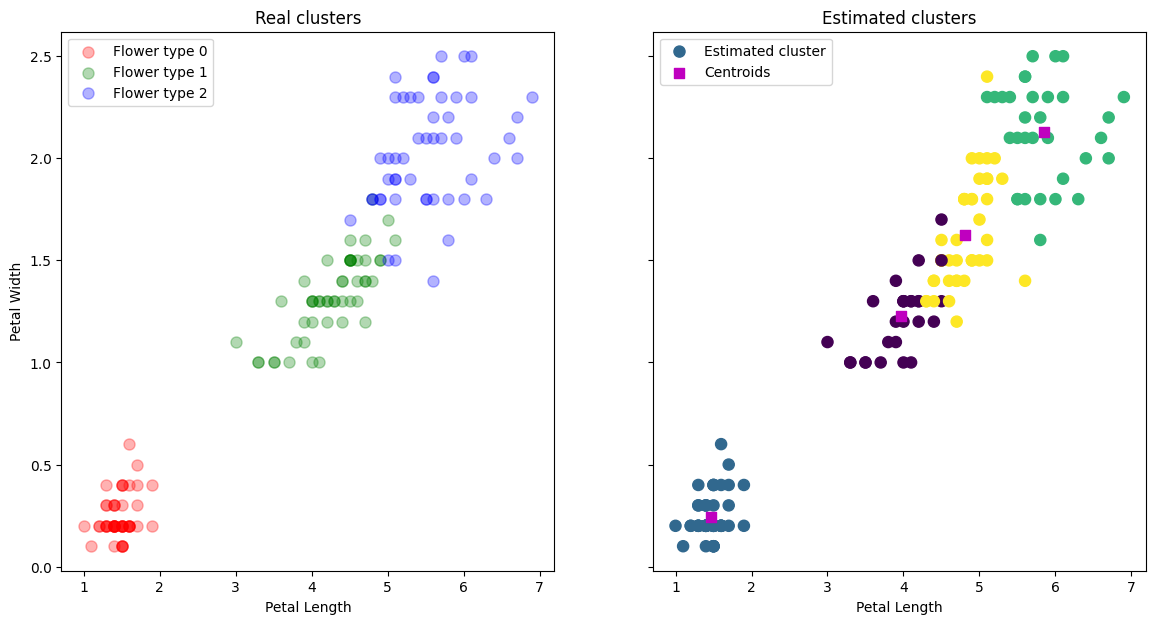

In [67]:
# Making two graphs to compare the real and estimated clusters
fig, axs = plt.subplots(1, 2, figsize=(14, 7), sharey=True)

# Real clusters
axs[0].scatter(df1.Petal_Length, df1.Petal_Width, label='Flower type 0', c='r', marker='o', s=64, alpha=0.3)
axs[0].scatter(df2.Petal_Length, df2.Petal_Width, label='Flower type 1', c='g', marker='o', s=64, alpha=0.3)
axs[0].scatter(df3.Petal_Length, df3.Petal_Width, label='Flower type 2', c='b', marker='o', s=64, alpha=0.3)
axs[0].set_xlabel('Petal Length')
axs[0].set_ylabel('Petal Width')
axs[0].set_title('Real clusters')
axs[0].legend()

# Estimated clusters
axs[1].scatter(dataset.Petal_Length, dataset.Petal_Width, c=km.labels_, s=64, cmap='viridis', label='Estimated cluster')
axs[1].scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='m', s=50, marker='s', label='Centroids')
axs[1].set_xlabel('Petal Length')
axs[1].set_title('Estimated clusters')
axs[1].legend()
plt.show()


<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...
- Note that for K=4 ...

Concluir

El número ideal de clusters es 3, ya que es el número de clases que tiene el dataset original.
Al utilizar 2 clusters, se puede observar que el cluster 0 es el que contiene a las flores de tipo 1 y 2, mientras que el cluster 1 contiene a las flores de tipo 0.
Al utilizar 4 clusters, se puede observar que el cluster 0 contiene a las flores de tipo 1, el cluster 1 contiene a las flores de tipo 0, el cluster 2 contiene a las flores de tipo 2 y el cluster 3 contiene a las flores de tipo 1 y 2.

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

In [68]:
# Intialize a list to hold sum of squared error (sse)
sse = []

# Define values of k
k_rng = range(1,10)


# For each k
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit_predict(dataset[['Petal_Length','Petal_Width','Sepal_Length','Sepal_Width']])
    sse.append(km.inertia_)

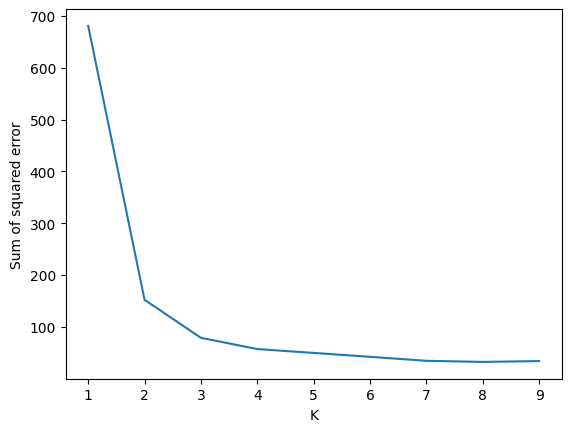

In [69]:
# Plot sse versus k
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)
plt.show()

Choose the k after which the sse is minimally reduced


# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k